In [1]:
# let's look at some real data from 1MWTT!
# Dataset number 1 : preregistrations per date
%matplotlib inline
import pandas as pd

In [2]:
fn1='soc18preregsbyday.csv'
preregs = pd.read_csv(fn1)

In [3]:
preregs.describe()

,Cumulative,Daily
count,90.000000,90.000000
mean,5846.300000,228.344444
std,5429.055397,269.406888
min,1.000000,1.000000
25%,1347.750000,57.250000
50%,3865.000000,173.000000
75%,10174.250000,295.250000
max,20551.000000,1555.000000


In [4]:
preregs.head()

,Date,Cumulative,Daily
0,4/2/18,1,1
1,4/3/18,2,1
2,4/4/18,4,2
3,4/5/18,21,17
4,4/6/18,31,10


In [5]:
preregs['Date'][0]

'4/2/18'

In [7]:
# first column is interpreted as strings
# convert to dates
asdate = pd.to_datetime(preregs['Date'])
asdate[0]

Timestamp('2018-04-02 00:00:00')

In [8]:
preregs['Date'] = asdate
preregs.head()

,Date,Cumulative,Daily
0,2018-04-02,1,1
1,2018-04-03,2,1
2,2018-04-04,4,2
3,2018-04-05,21,17
4,2018-04-06,31,10


In [11]:
preregs = preregs.set_index('Date')
preregs.head()

,Cumulative,Daily
Date,,
2018-04-02,1,1
2018-04-03,2,1
2018-04-04,4,2
2018-04-05,21,17
2018-04-06,31,10


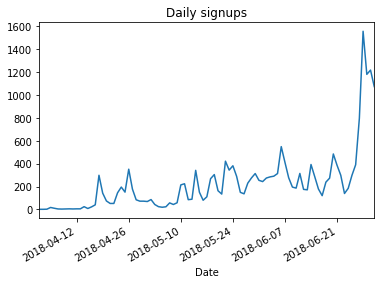

In [13]:
preregs['Daily'].plot(title='Daily signups')

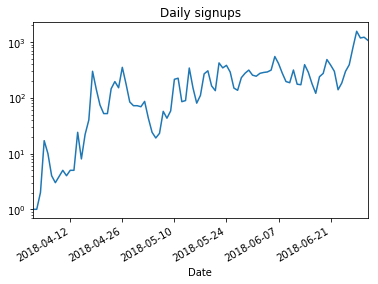

In [14]:
preregs['Daily'].plot(title='Daily signups',
                      logy=True)

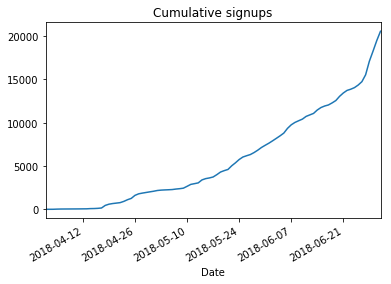

In [16]:
preregs['Cumulative'].plot(title='Cumulative signups')

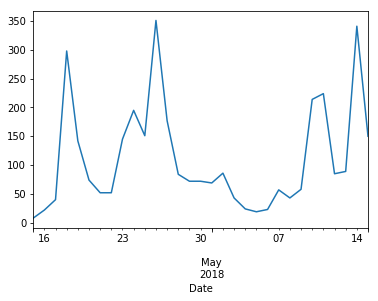

In [17]:
preregs['Daily']['2018-04-15':'2018-05-15'].plot()

In [31]:
preregs['Weekday'] = preregs.index.dayofweek

In [32]:
preregs.head()

,Cumulative,Daily,Weekday
Date,,,
2018-04-02,1,1,0
2018-04-03,2,1,1
2018-04-04,4,2,2
2018-04-05,21,17,3
2018-04-06,31,10,4


In [34]:
preregs['Weekday'] = preregs.index.weekday_name
preregs.head()

,Cumulative,Daily,Weekday
Date,,,
2018-04-02,1,1,Monday
2018-04-03,2,1,Tuesday
2018-04-04,4,2,Wednesday
2018-04-05,21,17,Thursday
2018-04-06,31,10,Friday


In [36]:
f = preregs.groupby('Weekday')['Daily']

In [47]:
median_per_day = f.median()

In [52]:
median_per_day

Weekday
Friday       243
Monday       187
Saturday     139
Sunday       120
Thursday     254
Tuesday      175
Wednesday    171
Name: Daily, dtype: int64

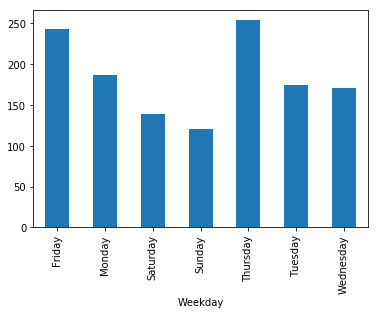

In [53]:
median_per_day.plot.bar()

In [54]:
inorder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
median_per_day = median_per_day[inorder]
median_per_day

Weekday
Monday       187
Tuesday      175
Wednesday    171
Thursday     254
Friday       243
Saturday     139
Sunday       120
Name: Daily, dtype: int64

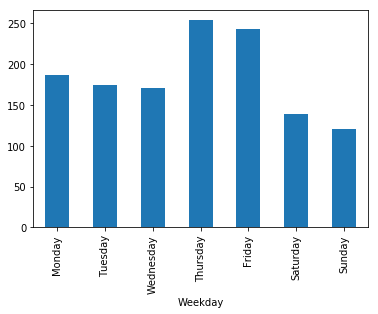

In [55]:
median_per_day.plot.bar()

In [70]:
# dataset 2 - signups per country
soc_fn = 'soc18worldcup_corrected.csv'
soc_data = pd.read_csv(soc_fn)

In [71]:
soc_data.head()

,Country,Learners,Population,Score
0,Afghanistan,19,"36,373,176",0.52
1,Åland Islands,1,"29,013",34.47
2,Albania,93,"2,934,363",31.69
3,Algeria,176,"42,008,054",4.19
4,American Samoa,4,"55,679",71.84


In [72]:
soc_data.describe() # why don't we see 'Population'?

,Learners,Score
count,143.000000,143.000000
mean,144.734266,33.147692
std,377.726128,271.143815
min,1.000000,0.020000
25%,6.000000,0.750000
50%,26.000000,3.180000
75%,88.500000,8.770000
max,2862.000000,3225.810000


In [73]:
soc_data['Population'].head()

0    36,373,176
1        29,013
2     2,934,363
3    42,008,054
4        55,679
Name: Population, dtype: object

In [74]:
soc_data['Population'] = soc_data['Population'].str.replace(',', '')
soc_data['Population'].head()

0    36373176
1       29013
2     2934363
3    42008054
4       55679
Name: Population, dtype: object

In [75]:
soc_data['Population'] = soc_data['Population'].astype(int)

In [76]:
soc_data['Population'].head()

0    36373176
1       29013
2     2934363
3    42008054
4       55679
Name: Population, dtype: int64

In [77]:
soc_data.describe()

,Learners,Population,Score
count,143.000000,1.430000e+02,143.000000
mean,144.734266,5.041288e+07,33.147692
std,377.726128,1.675197e+08,271.143815
min,1.000000,3.100000e+02,0.020000
25%,6.000000,3.974098e+06,0.750000
50%,26.000000,1.111294e+07,3.180000
75%,88.500000,3.752930e+07,8.770000
max,2862.000000,1.415046e+09,3225.810000


In [78]:
# assume we want to know how many learners there are from each continent
# but how do we know which country belongs to each continent?
# import another table and JOIN with it!
region_fn = 'iso3166countriesbyregion.csv'
region_data = pd.read_csv(region_fn)
region_data.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [80]:
joined = soc_data.set_index('Country').join(region_data.set_index('name'))
joined.head()

,Learners,Population,Score,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
Country,,,,,,,,,,,,,
Afghanistan,19,36373176,0.52,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
Åland Islands,1,29013,34.47,AX,ALA,248.0,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
Albania,93,2934363,31.69,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
Algeria,176,42008054,4.19,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
American Samoa,4,55679,71.84,AS,ASM,16.0,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [81]:
gbregion = joined.groupby('region')

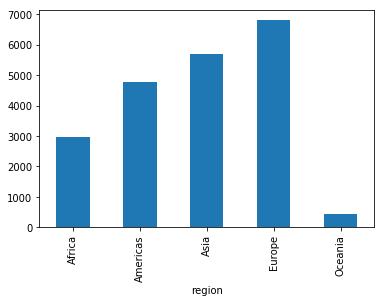

In [82]:
gbregion['Learners'].sum().plot.bar()

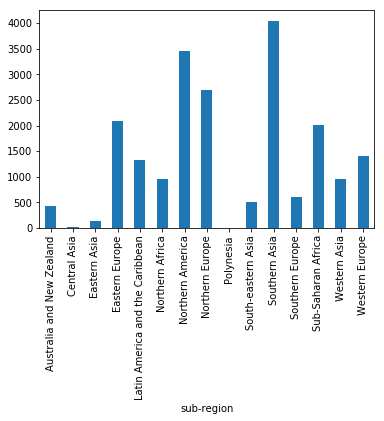

In [83]:
gbsubregion = joined.groupby('sub-region')
gbsubregion['Learners'].sum().plot.bar()